# abdolazizsalimi980292626Ex3


## Q1

In [218]:
import numpy as np 

In [219]:
class XorMLP():


    def step_function(self , input , t):
        return np.where(t <= input , 1 , 0)

    def __init__(self , threshold = [] , weight = []):
        assert len(threshold) == 3 
        assert len(weight) == 3
        self.threshold = threshold
        self.w = weight
    
    def predict(self , xorInput):

        #first layer 
        input_ = xorInput * self.w[:2]
        sum_first_layer = np.sum(input_ , axis=1)
        output_first_layer = self.step_function(sum_first_layer , self.threshold[:2])
        # mun 2 layer 
        input_num2_layer = output_first_layer
        sum_num2_layer  = np.sum(input_num2_layer * self.w[-1])
        output = self.step_function(sum_num2_layer , self.threshold[-1])
        return output

In [220]:
weight = [[2,-1],[-1,2],[2,2]]
threshold = [2,2,2]
X = xor_input = np.array([[0,0], [0,1], [1,0], [1,1]])
XOR = XorMLP(threshold= threshold , weight= weight)

In [221]:

xorInput = xor_input[2]
print('xorInput:' ,xorInput )
res = XOR.predict(xorInput)
print('output:' , res )

xorInput: [1 0]
output: 1


## feed forward network 

In [222]:
import numpy as np 


class Perceptron:
    def __init__(self, learning_rate = 0.01 , n_iters = 1000):
        self.n_iters = n_iters
        self.lr = learning_rate
        self.activation_function = self.unit_activashin_f
        self.weights = None
        self.bias = None

    def fit (self , X,y):
        n_sampels , n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0 
        y_ = np.array([1 if i<0 else 0 for i in y])

        for _ in range(self.n_iters):
            for idx , x_i in enumerate(X):
                linear_output = np.dot(x_i , self.weights) + self.bias
                y_predict= self.activation_function(linear_output) 

                update = self.lr * (y[idx] - y_predict)
                self.weights += update * x_i
                self.bias += update 
        
    

    def predict(self,X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predict = self.activation_function(linear_output)
        return y_predict
        

    
        
    

    def unit_activashin_f(self , x):
        return np.where(x>=0 , 1 , 0)
    


## MLP Test


Perceptron classification accuracy 1.0


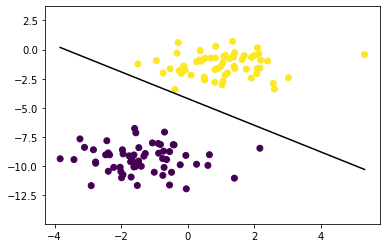

In [223]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

print("Perceptron classification accuracy", accuracy(y_test, predictions))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()

## load data and preprocessing

In [224]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
import pandas as pd 
X, y = datasets.make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=1.5, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Backpropagation Neural Network

In [225]:
class MLPwithBack:

    def __init__(self, learning_rate=0.1, iterations=5, N=None, input_size=None, hidden_size=None, output_size=1):
        self.lr = learning_rate 
        self.iter = iterations 
        self.N = N
        
        # Initialize weights
        np.random.seed(10)
        # initializing weight for the hidden layer
        self.W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

        # initializing weight for the output layer
        self.W2 = np.random.normal(scale=0.5, size=(hidden_size, output_size)) 
        self.results = pd.DataFrame(columns=["mse", "accuracy"] )

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def mean_squared_error(self, y_pred, y_true):
        y_true = y_true.reshape(len(y_true) , 1)
        return ((y_pred - y_true) ** 2).sum() / (2 * y_true.size)

    def accuracy(self , y_true, y_pred):
        y_pred_binary = np.where(y_pred>=.5 , 1 , 0)
        y_true = y_true.reshape(len(y_true) , 1) 
        accuracy = (y_pred_binary == y_true).mean()
        return accuracy

    def fit(self, X_train, y_train):  

        self.N = y_train.size
        
        for _ in range(self.iter):    
            # feed-forward propagation
            # on hidden layer
            Z1 = np.dot(X_train, self.W1)
            A1 = self.sigmoid(Z1)
            # on output layer
            Z2 = np.dot(A1, self.W2)
            A2 = self.sigmoid(Z2)

            # Calculating error
            mse = self.mean_squared_error(y_pred = A2, y_true = y_train)
            acc = self.accuracy(y_pred = A2,y_true = y_train)
            self.results = self.results.append({"mse":mse ,"accuracy" :acc},ignore_index=True )
            
            # back-propagation
            E1 = A2 - y_train.reshape(len(y_train) , 1)
            dW1 = E1 * A2 * (1 - A2)
            E2 = np.dot(dW1, self.W2.T)
            dW2 = E2 * A1 * (1 - A1)




            # weight updates
            W2_update = np.dot( A1.T, dW1) / self.N 
            W1_update = np.dot(X_train.T, dW2) / self.N


            self.W2 = self.W2 - self.lr * W2_update
            self.W1 = self.W1 - self.lr * W1_update

            
    def predict(self , X_test ):
        Z1 = np.dot(X_test, self.W1)
        A1 = self.sigmoid(Z1)
        Z2 = np.dot(A1, self.W2)
        A2 = self.sigmoid(Z2) 
        return np.where(A2>=.5 , 1 , 0)
            

## create model 

In [226]:
samples,input_layers = X_train.shape
hidden_layers = 8
iterations=2000
N = y_train.size
learning_rate=0.01
mlp = MLPwithBack(N=samples, input_size= input_layers , hidden_size= hidden_layers , iterations=iterations , learning_rate = learning_rate)
mlp.fit(X_train , y_train)


## plot Mean squared Error

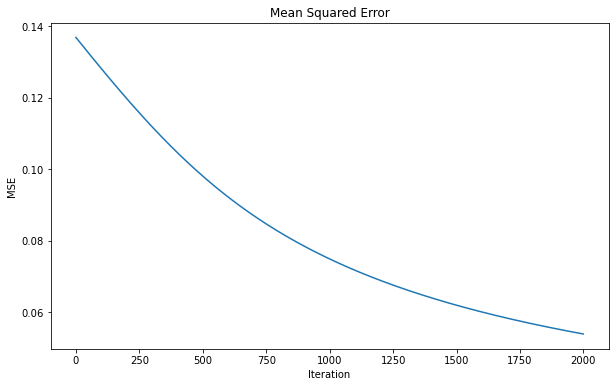

Minimum MSE:  0.05385337435438546


In [227]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # set figure size
mlp.results.mse.plot()
plt.title("Mean Squared Error")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.show()
print('Minimum MSE: ', mlp.results.mse.min())


## Plot Accuracy 

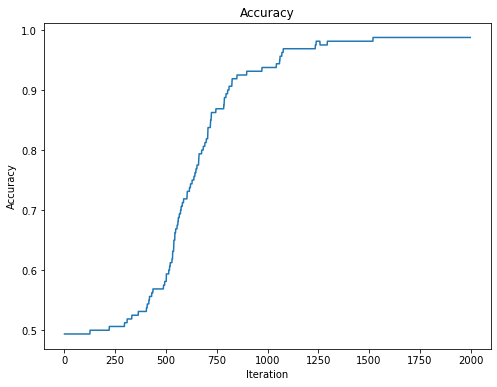

Accuracy: 100.00%


In [228]:
import matplotlib.pyplot as plt


# Plot accuracy
plt.figure(figsize=(8, 6))
mlp.results.accuracy.plot()
plt.title("Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.show()
print("Accuracy: {:.2f}%".format(acc * 100))


## Plot using express library 

In [229]:
import plotly.express as px

fig = px.line(mlp.results, x=mlp.results.index, y="mse")
fig.show()


In [230]:
import plotly.express as px

fig = px.line(mlp.results, x=mlp.results.index, y="accuracy")
fig.show()